# FIT5201 Data analysis algorithms S1 2019 
# Assignment 1
#### Student Name: Nisheeth Shah
#### Student ID: 29599644
#### Email Id: nsha0020@student.monash.edu

Date: 04/04/2019

Environment: R version 3.4.3.
Libraries used:
- reshape2
- ggplot2
- corrplot
- plotrix

# Section A. Model Complexity and Model Selection
## Question 2: L-fold Cross Validation
    I. Implement a L-Fold Cross Validation (CV) function: cv(train.data, train.label, numFold=10)
    II. compute the average 10 error numbers you have got for each k. Plot the average error numbers versus 1/K for K=1,..,20
    III. Report the values of K that result to minimum average error and minimum standard deviation of errors

### Importing Libraries

In [80]:
library(reshape2)
library(ggplot2)
library(corrplot)
library(plotrix)

### Read train and test datasets

In [81]:
# Read the csv files
train.data <- read.csv("Task1A_train.csv") 
test.data <- read.csv("Task1A_test.csv")  

# Seeting our data and labels seperately to easily access them further
train.label <- train.data[2]
train.data <- train.data[1]
test.label <- test.data[2]
test.data <- test.data[1]

# Having a look at first few rows
head(train.label)
head(train.data)
head(test.label)
head(test.data)

y
0.71
0.85
0.61
0.92
0.72
0.92


x1
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


y
0.63
0.44
0.69
0.55
0.77
0.60


x1
1960.25
1960.75
1961.25
1961.75
1962.25
1962.75


### I. KNN Regressor function

knn(train.data, train.label, test.data, K=3) which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It returns the regressed values for the test data points. When choosing the neighbors, we use the Euclidean distance function to measure the distance between a pair of data points.

In [82]:
## KNN regressor function
pred.label <- NULL
knn <- function(train.data, train.label, test.data, K=3){
  distance = 'euclidean'  #method of calculating distance
  train.len <- nrow(train.data)
  test.len <- nrow(test.data)
  dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
  for (i in 1:test.len){
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
    pred.label[i]<- (mean(train.label[nn]))
  }
  return (pred.label)
}

### II. L-Fold Cross Validation (CV) function

cv(train.data, train.label, numFold=10) which takes the training data and their labels (continuous values), the number of folds, and returns errors for different folds of the training data

In [83]:
## cross validation function
knn.cv <- function(train.data, train.label, nrFold = 10, K=3) {

    #Get number of rows in train data
    train.length <- nrow(train.data)
    
    #Creating 10 equally sized distinct folds
    folds <- sample(cut(seq(1, train.length), breaks = nrFold, labels = FALSE))
    
    #Dataframe to store errors
    error_list <- data.frame('folds' = 1:nrFold, 'train_error' = rep(0, nrFold))
    
    #Perform 10 fold cross validation
    for (i in seq(nrFold)){
        #Segement your data by fold using the which() function 
        index <- which(folds == i)
        
        #Set folds of data
        test.folds <- data.frame("value" = train.data[index,])
        train.folds <- data.frame("value" = train.data[-index,])
    
        #Get cut data
        test.label.folds <- train.label[index,]
        train.label.folds <- train.label[-index,]
        
        #Call KNN function
        knn.test.label = knn(train.folds, train.label.folds, test.folds, K=K)
        
        #Collecting error values
        error_list[i, 'train_error'] = sqrt(mean((test.label.folds - knn.test.label) ^ 2))
    }
    return (error_list)
}

### Calculating the Errors

In [84]:
error <- data.frame('K' = 1:20, 'Error' = rep(0, 20))

for (k in 1:20) {
    error[k, 'Error'] <- sqrt(mean(knn.cv(train.data, train.label, K=k)[,2]))
}
head(error) # let's have look at our training errors

# Lets print the value of k which gives minimum test error
which(error[,2]==min(error[,2]))

K,Error
1,0.7850961
2,0.6622626
3,0.6988121
4,0.6386174
5,0.7941117
6,0.7985402


[1] 4

Hence, at K = 4 is the optimum value and which the error is minimum.

### III. Plot the average error numbers versus 1/K for K=1,..,20.

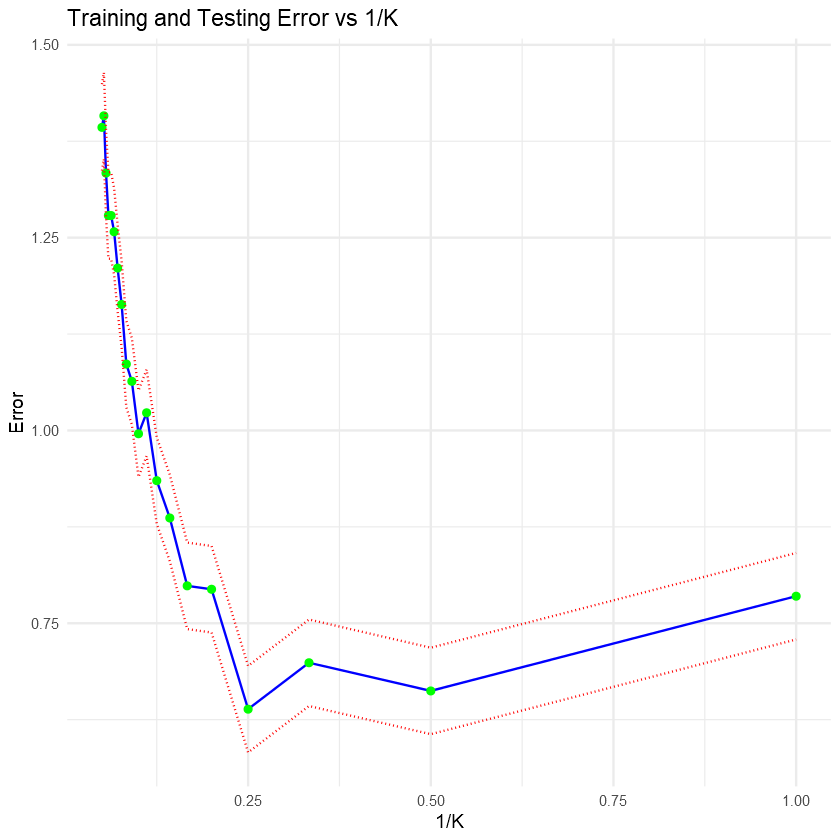

In [85]:
error_melt <- melt(error, id='K')
names(error_melt) <- c('K', 'Type', 'Error')

# Calculate the standard error
error_melt$se <- std.error(error_melt$Error)

# Plot the graph
ggplot(data = error_melt, aes(x = 1/K, y = Error, group = Type, color = Type)) + 
    geom_line(col = "blue") + 
    geom_point(col = "green") + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
    ggtitle("Training and Testing Error vs 1/K") +

    # Plotting the dotted +/- standard deviation line
    geom_line(aes(y=Error + se),linetype="dotted", col = "red") +
    geom_line(aes(y=Error - se),linetype="dotted", col = "red")

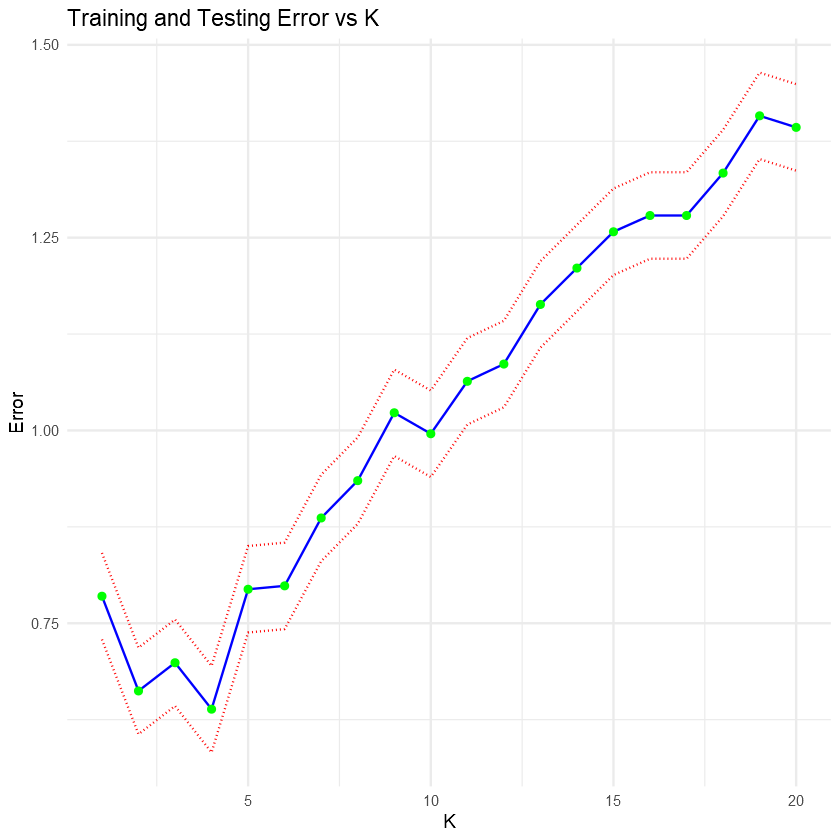

In [86]:
# Plot the graph
ggplot(data = error_melt, aes(x = K, y = Error, group = Type, color = Type)) + 
    geom_line(col = "blue") + 
    geom_point(col = "green") + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
    ggtitle("Training and Testing Error vs K") +

    # Plotting the dotted +/- standard deviation line
    geom_line(aes(y=Error + se),linetype="dotted", col = "red") +
    geom_line(aes(y=Error - se),linetype="dotted", col = "red")

Above graph represents the values of K, we see:
- the standard deviation of errors is minimum when k = 4.
- the minimum average error is around 0.75. The minimum average error is true when k is between 1 - 6.